In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score, roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC 

In [82]:
data = pd.read_csv('water_potability_final.csv')

In [83]:
df = pd.read_csv('water_potability_final.csv')

In [84]:
df = df.dropna(axis=1, how='all')

In [85]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,source
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,CIP (Clean-In-Place)
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,Process Water
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,CIP (Clean-In-Place)
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,CIP (Clean-In-Place)
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,CIP (Clean-In-Place)


Data Information

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2835 non-null   float64
 1   Hardness         3326 non-null   float64
 2   Solids           3326 non-null   float64
 3   Chloramines      3326 non-null   float64
 4   Sulfate          2545 non-null   float64
 5   Conductivity     3326 non-null   float64
 6   Organic_carbon   3326 non-null   float64
 7   Trihalomethanes  3164 non-null   float64
 8   Turbidity        3326 non-null   float64
 9   Potability       3326 non-null   int64  
 10  source           3326 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 286.0+ KB


Data Statistics

In [87]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2835.000000,3326.000000,3326.000000,3326.000000,2545.000000,3326.000000,3326.000000,3164.000000,3326.000000,3326.000000
mean,7.090904,195.581019,21690.716210,7.043770,329.989219,426.054102,14.156062,65.922268,3.938723,0.391762
std,1.587749,35.407319,9087.747581,1.707073,50.697549,85.865406,3.493278,16.857448,0.833832,0.488217
min,0.000000,15.000000,65.000000,0.100000,7.000000,65.000000,0.300000,0.738000,0.100000,0.000000
25%,6.102420,175.929485,15358.583795,6.080438,305.849797,365.304926,11.980276,55.505184,3.423936,0.000000
50%,7.053117,196.632907,20674.592450,7.100874,332.002630,421.884968,14.173984,66.371939,3.944376,0.000000
75%,8.063488,216.653284,27199.339640,8.098060,359.225704,482.435328,16.518850,77.267739,4.497705,1.000000
max,14.000000,398.000000,61227.196010,13.127000,481.030642,892.000000,28.300000,124.000000,6.739000,1.000000


Check Imbalance

In [88]:
print(df.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'source'],
      dtype='object')


In [89]:
data['Potability'].value_counts()

Potability
0    2023
1    1303
Name: count, dtype: int64

Check for missing values

In [90]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
source               0
dtype: int64

In [91]:
data.shape

(3326, 11)

Feature Engineering using correlation metrix

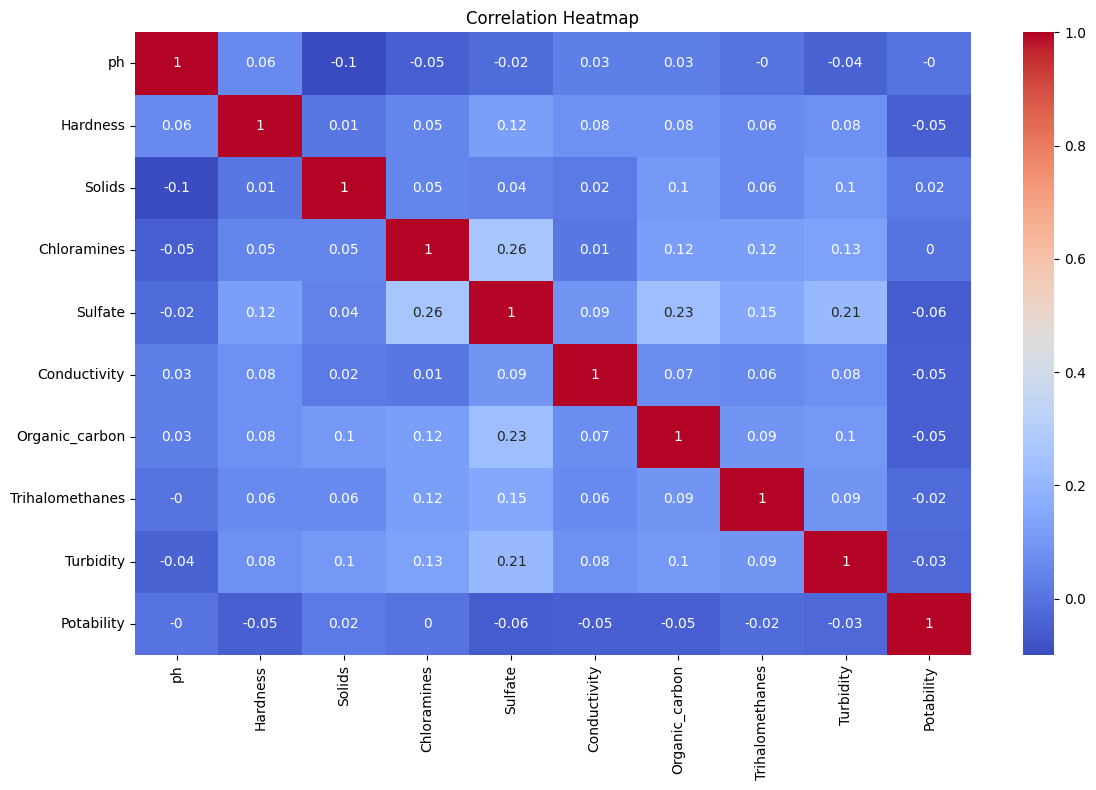

In [92]:
# Drop text/categorical columns before heatmap
numeric_data = data.select_dtypes(include="number")

plt.figure(figsize=(12, 8))
sns.heatmap(round(numeric_data.corr(), 2), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Data Analysis

In [93]:
fig = make_subplots(rows=5, cols=2, 
                    subplot_titles=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                                   'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity'),
                    vertical_spacing=0.05)

# Row 1
fig.add_trace(go.Histogram(x=data['ph'], name='ph'), row=1, col=1)
fig.add_trace(go.Histogram(x=data['Hardness'], name='Hardness'), row=1, col=2)

# Row 2
fig.add_trace(go.Histogram(x=data['Solids'], name='Solids'), row=2, col=1)
fig.add_trace(go.Histogram(x=data['Chloramines'], name='Chloramines'), row=2, col=2)

# Row 3
fig.add_trace(go.Histogram(x=data['Sulfate'], name='Sulfate'), row=3, col=1)
fig.add_trace(go.Histogram(x=data['Conductivity'], name='Conductivity'), row=3, col=2)

# Row 4
fig.add_trace(go.Histogram(x=data['Organic_carbon'], name='Organic_carbon'), row=4, col=1)
fig.add_trace(go.Histogram(x=data['Trihalomethanes'], name='Trihalomethanes'), row=4, col=2)

# Row 5
fig.add_trace(go.Histogram(x=data['Turbidity'], name='Turbidity'), row=5, col=1)

fig.update_layout(height=1800, width=800, title_text="Histogram", showlegend=False)
fig.show()

In [94]:
print(make_subplots)
print(go)

<function make_subplots at 0x00000218B20C1BD0>
<module 'plotly.graph_objects' from 'c:\\Users\\Shyama\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\plotly\\graph_objects\\__init__.py'>


In [95]:
! pip show plotly

Name: plotly
Version: 6.5.2
Summary: An open-source interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: 
Author-email: Chris P <chris@plot.ly>
License: MIT License
        
        Copyright (c) 2016-2024 Plotly Technologies Inc.
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in
        all copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXP

In [96]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [97]:
print(make_subplots)
print(go)

<function make_subplots at 0x00000218B20C1BD0>
<module 'plotly.graph_objects' from 'c:\\Users\\Shyama\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\plotly\\graph_objects\\__init__.py'>


In [98]:
fig = make_subplots(rows=5, cols=2, 
                    subplot_titles=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                                   'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity'),
                    vertical_spacing=0.05)

# Row 1
fig.add_trace(go.Box(y=data['ph'],x=data['Potability'], name='ph', marker_color='orange'), row=1, col=1)
fig.add_trace(go.Box(y=data['Hardness'],x=data['Potability'], name='Hardness', marker_color='red'), row=1, col=2)

# Row 2
fig.add_trace(go.Box(y=data['Solids'],x=data['Potability'], name='Solids', marker_color='brown'), row=2, col=1)
fig.add_trace(go.Box(y=data['Chloramines'],x=data['Potability'], name='Chloramines', marker_color='Black'), row=2, col=2)

# Row 3
fig.add_trace(go.Box(y=data['Sulfate'],x=data['Potability'], name='Sulfate', marker_color='grey'), row=3, col=1)
fig.add_trace(go.Box(y=data['Conductivity'],x=data['Potability'], name='Conductivity', marker_color='blue'), row=3, col=2)

# Row 4
fig.add_trace(go.Box(y=data['Organic_carbon'],x=data['Potability'], name='Organic_carbon', marker_color='pink'), row=4, col=1)
fig.add_trace(go.Box(y=data['Trihalomethanes'],x=data['Potability'], name='Trihalomethanes', marker_color='green'), row=4, col=2)

# Row 5
fig.add_trace(go.Box(y=data['Turbidity'],x=data['Potability'], name='Turbidity', marker_color='purple'), row=5, col=1)

fig.update_layout(height=2400, width=800, title_text="Box Plots")
fig.show()

Treating Outlier using Z-Score

In [99]:
# Step 1: Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include="number").columns
non_numeric_cols = data.select_dtypes(exclude="number").columns

# Step 2: Calculate z-scores on numeric only
z_scores = stats.zscore(data[numeric_cols])

# Step 3: Check outliers
outliers = (z_scores < -2.5) | (z_scores > 2.5)
print("Outliers per column:")
print(outliers.sum())

# Step 4: Mask outliers with NaN (only on numeric columns)
new_data = data.copy()
new_data[numeric_cols] = data[numeric_cols].mask(outliers, np.nan)

# Step 5: Add back the non-numeric columns (source column) unchanged
new_data[non_numeric_cols] = data[non_numeric_cols]

new_data.head()

Outliers per column:
350


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,source
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,CIP (Clean-In-Place)
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,Process Water
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,CIP (Clean-In-Place)
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,CIP (Clean-In-Place)
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,CIP (Clean-In-Place)


Using Imputation to handle missing data
- we cannot remove the missing values because our data is already low, so if we remove the null values, there might be possibility that we are going to loose the usefull data also thats why we are going to perform imputation  for which we are going to use SimpleImputer

In [100]:
# Apply imputer on numeric columns only
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(new_data[numeric_cols])

# Create imputed dataframe
imputed_data = pd.DataFrame(
    imp_mean.transform(new_data[numeric_cols]),
    columns=numeric_cols
)

# Add back source column unchanged
imputed_data[non_numeric_cols] = new_data[non_numeric_cols].values

print("✅ Imputation done!")
print(imputed_data.shape)
imputed_data.head()

✅ Imputation done!
(3326, 11)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,source
0,7.053117,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,CIP (Clean-In-Place)
1,3.716080,129.422921,18630.05786,6.635246,332.002630,592.885359,15.180013,56.329076,4.500656,0.0,Process Water
2,8.099124,224.236259,19909.54173,9.275884,332.002630,418.606213,16.868637,66.420093,3.055934,0.0,CIP (Clean-In-Place)
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0,CIP (Clean-In-Place)
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,CIP (Clean-In-Place)


In [101]:
imputed_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
source             0
dtype: int64

Using sampling Technique to treat data properly- we will use over-sampling so that our ddata containing less number of records containing water potability in positive side, so we will increase those recods so that our dataset will be balanced
- create 2 different dataframe of majority and minority class
- combine minority class with upsampled minority class

In [102]:
df_majority = imputed_data[imputed_data['Potability']==0]
df_minority = imputed_data[imputed_data['Potability']==1]

# upsample minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=1998,random_state=42)

# combine
df_upsampled= pd.concat([df_minority_upsampled,df_majority])

Splitting the data training and testing

In [103]:
upx = df_upsampled.iloc[:, :-1].values
upy = df_upsampled.iloc[:, -1].values
from sklearn.model_selection import train_test_split
upx_train, upx_test,upy_train, upy_test = train_test_split(upx, upy, train_size=0.8, random_state = 42)

Apply SMOTE on training set

In [104]:
! pip install imbalanced-learn

In [105]:
# Check class balance in training data
print("Training data class distribution:")
print(pd.Series(upy_train).value_counts())
print(f"\nTotal training samples: {len(upy_train)}")

Training data class distribution:
CIP (Clean-In-Place)    2021
Chiller Water            419
Borewell Water           331
Process Water            201
Cooling Tower            162
Municipal Supply          57
Final Rinse Water         11
Steam Condensate           6
RO Treated Water           5
Boiler Feed Water          3
Name: count, dtype: int64

Total training samples: 3216


In [106]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Scale the data
scaler = StandardScaler()
upx_train_scaled = scaler.fit_transform(upx_train)
upx_test_scaled  = scaler.transform(upx_test)

# Step 2: Apply SMOTE with fewer neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # ← Changed from default 5 to 2
upx_train_bal, upy_train_bal = smote.fit_resample(upx_train_scaled, upy_train)

print("Before SMOTE:", pd.Series(upy_train).value_counts().to_dict())
print("After SMOTE:", pd.Series(upy_train_bal).value_counts().to_dict())

Before SMOTE: {'CIP (Clean-In-Place)': 2021, 'Chiller Water': 419, 'Borewell Water': 331, 'Process Water': 201, 'Cooling Tower': 162, 'Municipal Supply': 57, 'Final Rinse Water': 11, 'Steam Condensate': 6, 'RO Treated Water': 5, 'Boiler Feed Water': 3}
After SMOTE: {'CIP (Clean-In-Place)': 2021, 'Borewell Water': 2021, 'Process Water': 2021, 'Chiller Water': 2021, 'Municipal Supply': 2021, 'Cooling Tower': 2021, 'Final Rinse Water': 2021, 'RO Treated Water': 2021, 'Steam Condensate': 2021, 'Boiler Feed Water': 2021}


In [107]:
# ── Load data ──
df = pd.read_csv("water_potability_final.csv")

# ── Encode source ──
le = LabelEncoder()
df["source_encoded"] = le.fit_transform(df["source"])

# ── Get numeric columns (exclude Potability and source text) ──
numeric_cols = df.select_dtypes(include="number").drop("Potability", axis=1).columns

# ── STEP 1: Impute missing values FIRST ──
imputer = SimpleImputer(strategy="mean")  # or "median"
X_imputed = imputer.fit_transform(df[numeric_cols])

# Convert back to DataFrame
X = pd.DataFrame(X_imputed, columns=numeric_cols)
y = df["Potability"]

# Check for NaN
print("Missing values after imputation:", X.isnull().sum().sum())
print("Class balance:", y.value_counts().to_dict())

# ── STEP 2: Train-Test Split ──
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain class balance:", pd.Series(y_train).value_counts().to_dict())

# ── STEP 3: Scale ──
scaler = StandardScaler()
upx_train_scaled = scaler.fit_transform(X_train)
upx_test_scaled  = scaler.transform(X_test)

# ── STEP 4: SMOTE ──
smote = SMOTE(random_state=42, k_neighbors=2)
upx_train_bal, upy_train_bal = smote.fit_resample(upx_train_scaled, y_train)

print("\n✅ After SMOTE:", pd.Series(upy_train_bal).value_counts().to_dict())
print("✅ Training data shape:", upx_train_bal.shape)
print("✅ Test data shape:", upx_test_scaled.shape)


Missing values after imputation: 0
Class balance: {0: 2023, 1: 1303}

Train class balance: {0: 1618, 1: 1042}

✅ After SMOTE: {0: 1618, 1: 1618}
✅ Training data shape: (3236, 10)
✅ Test data shape: (666, 10)


In [108]:
print("Available dataframes:", [var for var in dir() if isinstance(eval(var), pd.DataFrame)])

Available dataframes: ['X', 'X_categorical', 'X_numeric', 'X_processed', 'X_test', 'X_train', 'X_train_balanced', '_100', '_19', '_20', '_5', '_7', '_85', '_87', '_99', '__', '___', 'baseline_df', 'comparison', 'data', 'df', 'df_majority', 'df_minority', 'df_minority_upsampled', 'df_original', 'df_upsampled', 'imputed_data', 'new_data', 'numeric_data', 'results_df', 'smote_df', 'test_feature', 'train_feature', 'upx_train_balanced']


In [109]:
# ── Load data ──
df = pd.read_csv("water_potability_final.csv")
print("Initial shape:", df.shape)
print("Initial NaN count:", df.isnull().sum().sum())

# ── Encode source ──
le = LabelEncoder()
df["source_encoded"] = le.fit_transform(df["source"])

# ── Select ALL numeric columns (including source_encoded) ──
X_cols = df.select_dtypes(include="number").drop("Potability", axis=1).columns
print("\nColumns selected:", X_cols.tolist())

# ── Impute ALL numeric columns ──
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df[X_cols])

# ── Convert to DataFrame ──
X = pd.DataFrame(X_imputed, columns=X_cols)
y = df["Potability"].values  # ← Use .values to avoid index issues

# ── Verify NO NaN ──
print("\n✅ After imputation - NaN count:", X.isnull().sum().sum())
print("✅ After imputation - Has NaN?", X.isnull().any().any())
print("✅ After imputation - Has inf?", np.isinf(X.values).any())

# ── Train-Test Split ──
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42, stratify=y  # ← Use .values
)

print("\n✅ Train shape:", X_train.shape)
print("✅ Train NaN?", np.isnan(X_train).any())

# ── Scale ──
scaler = StandardScaler()
upx_train_scaled = scaler.fit_transform(X_train)
upx_test_scaled  = scaler.transform(X_test)

print("\n✅ Scaled train NaN?", np.isnan(upx_train_scaled).any())
print("✅ Scaled train inf?", np.isinf(upx_train_scaled).any())

# ── SMOTE ──
smote = SMOTE(random_state=42, k_neighbors=2)
upx_train_bal, upy_train_bal = smote.fit_resample(upx_train_scaled, y_train)

print("\n✅✅✅ SUCCESS!")
print("After SMOTE:", pd.Series(upy_train_bal).value_counts().to_dict())
print("Training data shape:", upx_train_bal.shape)

Initial shape: (3326, 11)
Initial NaN count: 1434

Columns selected: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'source_encoded']

✅ After imputation - NaN count: 0
✅ After imputation - Has NaN? False
✅ After imputation - Has inf? False

✅ Train shape: (2660, 10)
✅ Train NaN? False

✅ Scaled train NaN? False
✅ Scaled train inf? False

✅✅✅ SUCCESS!
After SMOTE: {0: 1618, 1: 1618}
Training data shape: (3236, 10)


### DATA MODELLING

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score,recall_score,precision_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle

In [111]:
from sklearn.model_selection import train_test_split

# Suppose your dataset is in df
X = df.drop("Potability", axis=1)   # all features
y = df["Potability"]                # target column

# Now split
train_feature, test_feature, train_target, test_target = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1200,
    stratify=y   # ensures balanced classes
)

In [112]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'source', 'source_encoded'],
      dtype='object')


In [113]:
train_feature.shape, test_feature.shape, train_target.shape, test_target.shape

((2660, 11), (666, 11), (2660,), (666,))

In [114]:
train_target.value_counts()

Potability
0    1618
1    1042
Name: count, dtype: int64

In [115]:
test_target.value_counts()

Potability
0    405
1    261
Name: count, dtype: int64

SMOTE-Based Model Training and Evaluation Pipeline

In [116]:
# ================================
# 0. Separate numeric & categorical
# ================================

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


# ================================
# 1. Impute numeric columns ONLY
# ================================

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X_numeric = pd.DataFrame(
    num_imputer.fit_transform(X[numeric_cols]),
    columns=numeric_cols
)


# ================================
# 2. Encode categorical columns
# ================================

X_categorical = pd.get_dummies(
    X[categorical_cols],
    drop_first=True
)


# ================================
# 3. Combine numeric + categorical
# ================================

X_processed = pd.concat(
    [X_numeric, X_categorical],
    axis=1
)


# ================================
# 4. Train Test Split
# ================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ================================
# 5. Apply SMOTE ONLY on training
# ================================

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(
    X_train,
    y_train
)


# ================================
# 6. Scaling
# ================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_bal_scaled = scaler.fit_transform(X_train_bal)

X_test_scaled = scaler.transform(X_test)


# ================================
# 7. Train model
# ================================

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(
    X_train_bal_scaled,
    y_train_bal
)


# ================================
# 8. Predict
# ================================

y_pred = model.predict(X_test_scaled)


# ================================
# 9. Evaluate
# ================================

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.81      0.75       405
           1       0.60      0.43      0.50       261

    accuracy                           0.66       666
   macro avg       0.64      0.62      0.62       666
weighted avg       0.65      0.66      0.65       666



In [ ]:
# ============================================================
# SMOTE-Based Model Training and Evaluation Pipeline
# Multiple Classifiers Comparison
# ============================================================


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score
)
# ============================================================
# STEP 0: Separate Features and Target
# ============================================================

# Example target column name (change if different)
target_column = "Potability"

# Drop original categorical column 'source'
X = df.drop(columns=[target_column, "source"], errors="ignore")

# Target
y = df[target_column]

# Ensure only numeric data
X = X.select_dtypes(include=["number"])



# ============================================================
# STEP 1: Handle Missing Values
# ============================================================

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# ============================================================
# STEP 2: Train-Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================================================
# STEP 3: Apply SMOTE ONLY on Training Data
# ============================================================

smote = SMOTE(random_state=42)

upx_train_bal, upy_train_bal = smote.fit_resample(
    X_train, y_train
)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(upy_train_bal))


# ============================================================
# STEP 4: Feature Scaling
# ============================================================

scaler = StandardScaler()

upx_train_bal_scaled = scaler.fit_transform(upx_train_bal)
upx_test_scaled = scaler.transform(X_test)


# ============================================================
# STEP 5: Define Models
# ============================================================

models = [

    LogisticRegression(max_iter=1000, random_state=42),

    GaussianNB(),

    svm.SVC(probability=True, random_state=42),

    KNeighborsClassifier(),

    DecisionTreeClassifier(random_state=42),

    RandomForestClassifier(random_state=42),

    GradientBoostingClassifier(random_state=42),

    XGBClassifier(eval_metric="logloss", random_state=42)

]


model_names = [

    "LogisticRegression",
    "GaussianNB",
    "SVM",
    "KNN",
    "DecisionTree",
    "RandomForest",
    "GradientBoosting",
    "XGBoost"

]


# ============================================================
# STEP 6: Train, Save, and Evaluate Models
# ============================================================

results = []

for model, name in zip(models, model_names):

    print("\n" + "="*60)
    print("Model:", name)
    print("="*60)

    # Train model
    model.fit(upx_train_bal_scaled, upy_train_bal)

    # Save model
    pickle.dump(model, open(name + ".pkl", "wb"))

    # Predict
    y_pred = model.predict(upx_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = cm.ravel()

    recall = recall_score(y_test, y_pred)
    specificity = TN / (TN + FP)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print report
    print(classification_report(y_test, y_pred))

    print("Recall      :", round(recall, 4))
    print("Specificity :", round(specificity, 4))
    print("Accuracy    :", round(accuracy, 4))
    print("Precision   :", round(precision, 4))
    print("F1 Score    :", round(f1, 4))

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1 Score": f1
    })


# ============================================================
# STEP 7: Results Comparison Table
# ============================================================

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by="F1 Score",
    ascending=False
)

print("\nFinal Model Comparison:")
print(results_df)


BEFORE SMOTE Pipeline

In [163]:
# ============================================================
# BASELINE PIPELINE (WITHOUT SMOTE)
# ============================================================


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ============================================================
# STEP 1: Handle Missing Values
# ============================================================

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# ============================================================
# STEP 2: Train Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================================================
# STEP 3: Scaling
# ============================================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# STEP 4: Models
# ============================================================

models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    svm.SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric="logloss")
]

names = [
    "LogisticRegression",
    "GaussianNB",
    "SVM",
    "KNN",
    "DecisionTree",
    "RandomForest",
    "GradientBoosting",
    "XGBoost"
]

baseline_results = []

# ============================================================
# STEP 5: Train and Evaluate
# ============================================================

for model, name in zip(models, names):

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = cm.ravel()

    baseline_results.append({

        "Model": name,

        "Accuracy": accuracy_score(y_test, y_pred),

        "Precision": precision_score(y_test, y_pred),

        "Recall": recall_score(y_test, y_pred),

        "Specificity": TN / (TN + FP),

        "F1 Score": f1_score(y_test, y_pred)

    })

baseline_df = pd.DataFrame(baseline_results)

print("\nBaseline Results (Before SMOTE)")
print(baseline_df.sort_values("F1 Score", ascending=False))



Baseline Results (Before SMOTE)
                Model  Accuracy  Precision    Recall  Specificity  F1 Score
5        RandomForest  0.690691   0.689655  0.383142     0.888889  0.492611
4        DecisionTree  0.603604   0.494208  0.490421     0.676543  0.492308
7             XGBoost  0.656156   0.588889  0.406130     0.817284  0.480726
3                 KNN  0.654655   0.595092  0.371648     0.837037  0.457547
2                 SVM  0.677177   0.716981  0.291188     0.925926  0.414169
6    GradientBoosting  0.665165   0.675926  0.279693     0.913580  0.395664
1          GaussianNB  0.608108   0.500000  0.218391     0.859259  0.304000
0  LogisticRegression  0.614114   0.642857  0.034483     0.987654  0.065455


AFTER SMOTE Pipeline

In [119]:
# ============================================================
# SMOTE PIPELINE
# ============================================================

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)

# Scaling
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

smote_results = []

# Train and Evaluate
for model, name in zip(models, names):

    model.fit(X_train_smote_scaled, y_train_smote)

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = cm.ravel()

    smote_results.append({

        "Model": name,

        "Accuracy": accuracy_score(y_test, y_pred),

        "Precision": precision_score(y_test, y_pred),

        "Recall": recall_score(y_test, y_pred),

        "Specificity": TN / (TN + FP),

        "F1 Score": f1_score(y_test, y_pred)

    })

smote_df = pd.DataFrame(smote_results)

print("\nSMOTE Results (After SMOTE)")
print(smote_df.sort_values("F1 Score", ascending=False))



SMOTE Results (After SMOTE)
                Model  Accuracy  Precision    Recall  Specificity  F1 Score
6    GradientBoosting  0.681682   0.624365  0.471264     0.817284  0.537118
2                 SVM  0.626126   0.522222  0.540230     0.681481  0.531073
3                 KNN  0.617117   0.510870  0.540230     0.666667  0.525140
5        RandomForest  0.663664   0.594872  0.444444     0.804938  0.508772
7             XGBoost  0.648649   0.565217  0.448276     0.777778  0.500000
4        DecisionTree  0.599099   0.488462  0.486590     0.671605  0.487524
0  LogisticRegression  0.569069   0.456376  0.521073     0.600000  0.486583
1          GaussianNB  0.603604   0.491018  0.314176     0.790123  0.383178


In [120]:
comparison = baseline_df.merge(
    smote_df,
    on="Model",
    suffixes=("_Before_SMOTE", "_After_SMOTE")
)

print("\nFinal Comparison: Before vs After SMOTE")
print(comparison)



Final Comparison: Before vs After SMOTE
                Model  Accuracy_Before_SMOTE  Precision_Before_SMOTE  \
0  LogisticRegression               0.614114                0.642857   
1          GaussianNB               0.608108                0.500000   
2                 SVM               0.675676                0.710280   
3                 KNN               0.657658                0.600000   
4        DecisionTree               0.632132                0.530534   
5        RandomForest               0.689189                0.698529   
6    GradientBoosting               0.671171                0.677966   
7             XGBoost               0.663664                0.594872   

   Recall_Before_SMOTE  Specificity_Before_SMOTE  F1 Score_Before_SMOTE  \
0             0.034483                  0.987654               0.065455   
1             0.218391                  0.859259               0.304000   
2             0.291188                  0.923457               0.413043   
3         

In [121]:
print(X.isna().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
source_encoded       0
dtype: int64


In [122]:
print("upy_test length:", len(upy_test))
print("upx_test_scaled length:", len(upx_test_scaled))


upy_test length: 805
upx_test_scaled length: 666


Use of Grid Search CV

STEP 1: BASELINE MODEL COMPARISON (NO TUNING)

In [164]:
# ============================================================
# Handle Missing Values
# ============================================================

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


# ============================================================
# Train-Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# ============================================================
# Apply SMOTE
# ============================================================

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))


# ============================================================
# Scaling
# ============================================================

scaler = StandardScaler()

X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


# ============================================================
# Define baseline models
# ============================================================

models = {

    "LogisticRegression": LogisticRegression(max_iter=1000),

    "GaussianNB": GaussianNB(),

    "SVM": svm.SVC(probability=True),

    "KNN": KNeighborsClassifier(),

    "DecisionTree": DecisionTreeClassifier(),

    "RandomForest": RandomForestClassifier(),

    "GradientBoosting": GradientBoostingClassifier(),

    "XGBoost": XGBClassifier(eval_metric="logloss")

}


# ============================================================
# Train and Evaluate
# ============================================================

results = []

for name, model in models.items():

    print(f"\n{name}")
    print("="*50)

    model.fit(X_train_bal_scaled, y_train_bal)

    y_pred = model.predict(X_test_scaled)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN/(TN+FP)

    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Specificity": specificity
    })


results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)

print("\nBaseline Results:")
print(results_df)

# Best model name
best_model_name = results_df.iloc[0]["Model"]

print("\nBest baseline model:", best_model_name)


Before SMOTE: [1618 1042]
After SMOTE: [1618 1618]

LogisticRegression
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       405
           1       0.46      0.52      0.49       261

    accuracy                           0.57       666
   macro avg       0.56      0.56      0.56       666
weighted avg       0.58      0.57      0.58       666


GaussianNB
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       405
           1       0.49      0.31      0.38       261

    accuracy                           0.60       666
   macro avg       0.57      0.55      0.55       666
weighted avg       0.58      0.60      0.58       666


SVM
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       405
           1       0.52      0.55      0.53       261

    accuracy                           0.62       666
   macro avg       0.61      0.61      0

STEP 2 — Identify Best Model

In [124]:
results_df = results_df.sort_values("F1 Score", ascending=False)

print(results_df)

                Model  Accuracy  Precision    Recall  F1 Score  Specificity
2                 SVM  0.626126   0.522222  0.540230  0.531073     0.681481
3                 KNN  0.617117   0.510870  0.540230  0.525140     0.666667
5        RandomForest  0.665165   0.594059  0.459770  0.518359     0.797531
6    GradientBoosting  0.660661   0.587065  0.452107  0.510823     0.795062
7             XGBoost  0.648649   0.565217  0.448276  0.500000     0.777778
4        DecisionTree  0.599099   0.488462  0.486590  0.487524     0.671605
0  LogisticRegression  0.569069   0.456376  0.521073  0.486583     0.600000
1          GaussianNB  0.603604   0.491018  0.314176  0.383178     0.790123


GridSearchCV loop:Tunning

Define models and their hyperparameters to test

In [125]:
# ── Define models WITH hyperparameter grids ──
model_params = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],           # Regularization strength
            "solver": ["lbfgs", "liblinear"]    # Optimization algorithm
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]  # Smoothing parameter
        }
    },
    "SVC": {
        "model": svm.SVC(random_state=42, probability=True),
        "params": {
            "C": [0.1, 1, 10],          # Penalty parameter
            "kernel": ["rbf", "linear"] # Type of boundary
        }
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],        # Number of neighbors
            "weights": ["uniform", "distance"]  # How to weight neighbors
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],          # Tree depth
            "criterion": ["gini", "entropy"]        # Split quality measure
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],             # Number of trees
            "max_depth": [5, 10, None],             # Tree depth
            "criterion": ["gini", "entropy"]        # Split measure
        }
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],             # Boosting rounds
            "learning_rate": [0.05, 0.1, 0.2],     # Step size
            "max_depth": [3, 5]                     # Tree depth
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(random_state=42, eval_metric="logloss"),
        "params": {
            "n_estimators": [100, 200],             # Boosting rounds
            "learning_rate": [0.05, 0.1],           # Step size
            "max_depth": [3, 5, 7]                  # Tree depth
        }
    }
}




In [126]:
# ── Train with GridSearchCV ──
Recall, Specificity, Accuracy, Precision, F1_Scores = [], [], [], [], []
best_params_list = []

for name, mp in model_params.items():
    print(f"\n{'='*60}")
    print(f"🔍 Tuning: {name}")
    print('='*60)

   

   


🔍 Tuning: LogisticRegression

🔍 Tuning: GaussianNB

🔍 Tuning: SVC

🔍 Tuning: KNeighborsClassifier

🔍 Tuning: DecisionTreeClassifier

🔍 Tuning: RandomForestClassifier

🔍 Tuning: GradientBoostingClassifier

🔍 Tuning: XGBClassifier


In [127]:
 # GridSearchCV finds best hyperparameters using 5-fold cross validation
grid = GridSearchCV(
        mp["model"],
        mp["params"],
        cv=5,               # 5-fold cross validation
        scoring="f1",       # Optimize for F1 score
        n_jobs=-1,          # Use all CPU cores
        verbose=0
    )

grid.fit(upx_train_bal, upy_train_bal)



,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [128]:
# Best model found by GridSearch
best_model = grid.best_estimator_
print(f"✅ Best Parameters: {grid.best_params_}")
best_params_list.append(grid.best_params_)

✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


In [129]:
best_f1 = 0
best_model = None
best_model_name = ""

for name, config in model_params.items():
    model = config["model"]
    params = config["params"]
    
    grid = GridSearchCV(model, params, cv=5, scoring="f1")
    grid.fit(X_train_bal_scaled, y_train_bal)
    
    y_pred = grid.best_estimator_.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name}: F1 = {f1:.4f}")  # ← Add this to see all scores
    
    if f1 > best_f1:
        best_f1 = f1
        best_model = grid.best_estimator_
        best_model_name = name

print(f"\n🏆 Best Model: {best_model_name}")
print(f"🏆 Best F1 Score: {best_f1:.4f}")


LogisticRegression: F1 = 0.4866
GaussianNB: F1 = 0.3832
SVC: F1 = 0.5232
KNeighborsClassifier: F1 = 0.5130
DecisionTreeClassifier: F1 = 0.5010
RandomForestClassifier: F1 = 0.5412
GradientBoostingClassifier: F1 = 0.5344
XGBClassifier: F1 = 0.5283

🏆 Best Model: RandomForestClassifier
🏆 Best F1 Score: 0.5412


Method 4 — Save best model automatically

In [130]:
pickle.dump(best_model, open("Best_Model.pkl", "wb"))


In [131]:
Recall = []
Specificity = []
Accuracy = []
Precision = []
F1_Scores = []
best_params_list = []
models_names = []

for name, mp in model_params.items():

    grid = GridSearchCV(
        mp["model"],
        mp["params"],
        cv=5,
        scoring="f1",
        n_jobs=-1
    )

    grid.fit(upx_train_bal_scaled, upy_train_bal)

    best_model = grid.best_estimator_

    # Save model
    pickle.dump(best_model, open(f"{name}.pkl", "wb"))

    # Predict
    y_pred = best_model.predict(upx_test_scaled)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    rec  = round(recall_score(y_test, y_pred, zero_division=0), 4)
    spec = round((cm[0,0] / (cm[0,0] + cm[0,1])), 4)
    acc  = round(accuracy_score(y_test, y_pred), 4)
    prec = round(precision_score(y_test, y_pred, zero_division=0), 4)
    f1   = round(f1_score(y_test, y_pred, zero_division=0), 4)

    # Append ALL inside loop
    models_names.append(name)
    Recall.append(rec)
    Specificity.append(spec)
    Accuracy.append(acc)
    Precision.append(prec)
    F1_Scores.append(f1)
    best_params_list.append(grid.best_params_)


              precision    recall  f1-score   support

           0       0.66      0.60      0.63       405
           1       0.46      0.52      0.49       261

    accuracy                           0.57       666
   macro avg       0.56      0.56      0.56       666
weighted avg       0.58      0.57      0.57       666

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       405
           1       0.49      0.31      0.38       261

    accuracy                           0.60       666
   macro avg       0.57      0.55      0.55       666
weighted avg       0.58      0.60      0.58       666

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       405
           1       0.51      0.54      0.52       261

    accuracy                           0.61       666
   macro avg       0.60      0.60      0.60       666
weighted avg       0.62      0.61      0.62       666

              preci

In [132]:
print(len(models_names))
print(len(Accuracy))
print(len(Precision))
print(len(Recall))
print(len(F1_Scores))
print(len(Specificity))
print(len(best_params_list))


8
8
8
8
8
8
8


In [133]:
results_df = pd.DataFrame({
    "Model": models_names,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1_Score": F1_Scores,
    "Specificity": Specificity,
    "Best_Params": best_params_list
})


visual comparison of all the metrics

In [134]:
print(upx.shape)
print(upy.shape)


(4021, 10)
(4021,)


In [135]:
# import pandas as pd

# Load the original dataset
df_original = pd.read_csv("water_potability_final.csv")

# Show its columns
print(df_original.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'source'],
      dtype='object')


Using Hyperparameters on the best model

✅ Model Comparison Results:
Rank                      Model  Accuracy  Precision  Recall  F1_Score  Specificity Best Model
   🥇     RandomForestClassifier    0.6742     0.6038  0.4904    0.5412       0.7926      ✅ YES
   🥈 GradientBoostingClassifier    0.6652     0.5872  0.4904    0.5344       0.7778           
   🥉              XGBClassifier    0.6622     0.5833  0.4828    0.5283       0.7778           
 4th                        SVC    0.6141     0.5072  0.5402    0.5232       0.6617           
 5th       KNeighborsClassifier    0.6066     0.4982  0.5287    0.5130       0.6568           
 6th     DecisionTreeClassifier    0.6111     0.5039  0.4981    0.5010       0.6840           
 7th         LogisticRegression    0.5691     0.4564  0.5211    0.4866       0.6000           
 8th                 GaussianNB    0.6036     0.4910  0.3142    0.3832       0.7901           


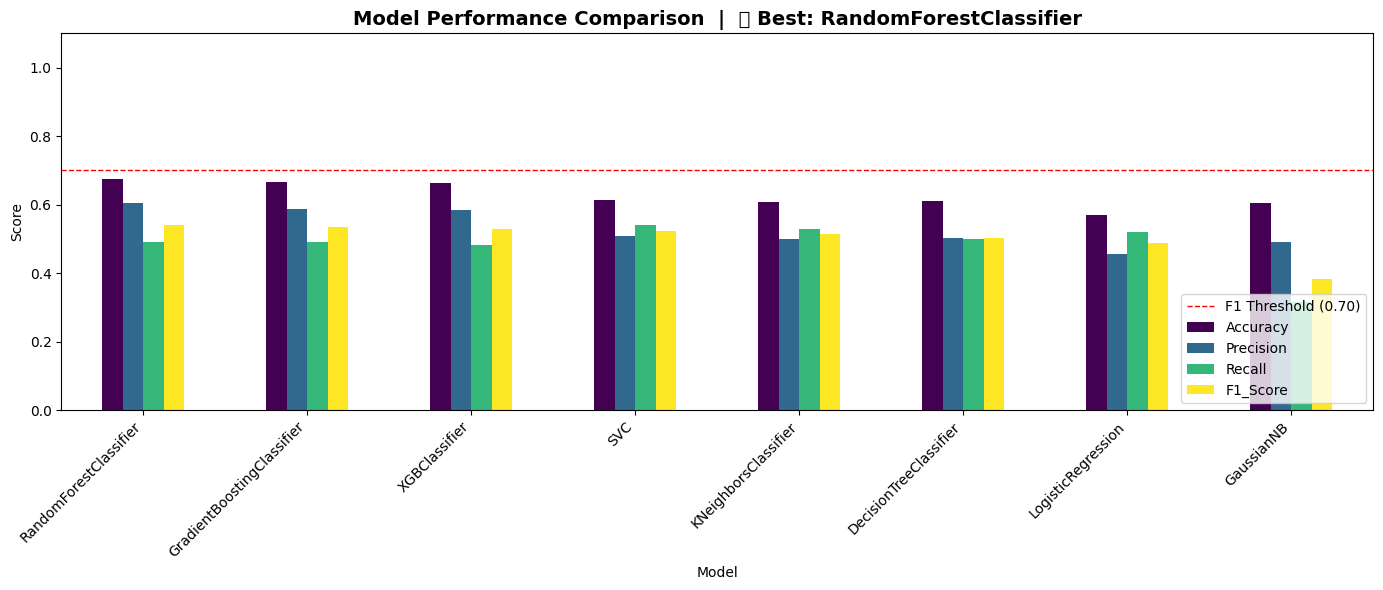


🏆 BEST MODEL: RandomForestClassifier
   Accuracy  : 0.6742
   Precision : 0.6038
   Recall    : 0.4904
   F1 Score  : 0.5412


In [136]:
# ── Automatically build results from your lists ──
results_df = pd.DataFrame({
    "Model":      models_names,
    "Accuracy":   Accuracy,
    "Precision":  Precision,
    "Recall":     Recall,
    "F1_Score":   F1_Scores,
    "Specificity": Specificity
})

# Sort by F1 Score best to worst
results_df = results_df.sort_values("F1_Score", ascending=False).reset_index(drop=True)

# Add Rank column
results_df.insert(0, "Rank", ["🥇", "🥈", "🥉", "4th", "5th", "6th", "7th", "8th"])

# Add Best Model flag
results_df["Best Model"] = results_df["Rank"].apply(lambda x: "✅ YES" if x == "🥇" else "")

print("✅ Model Comparison Results:")
print(results_df.to_string(index=False))

# ── Plot grouped bar chart ──
metrics = ["Accuracy", "Precision", "Recall", "F1_Score"]

fig, ax = plt.subplots(figsize=(14, 6))
results_df.plot(x="Model", y=metrics, kind="bar", ax=ax, colormap="viridis")

# Highlight best model
best_model = results_df.iloc[0]["Model"]
ax.set_title(f"Model Performance Comparison  |  🏆 Best: {best_model}", fontsize=14, fontweight="bold")
ax.set_ylabel("Score")
ax.set_ylim(0, 1.1)
ax.axhline(y=0.70, color="red", linestyle="--", linewidth=1, label="F1 Threshold (0.70)")
ax.set_xticklabels(results_df["Model"], rotation=45, ha="right")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ── Print Best Model Summary ──
best = results_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best['Model']}")
print(f"   Accuracy  : {best['Accuracy']:.4f}")
print(f"   Precision : {best['Precision']:.4f}")
print(f"   Recall    : {best['Recall']:.4f}")
print(f"   F1 Score  : {best['F1_Score']:.4f}")

GridSearchCV

In [137]:
grid = GridSearchCV(
    mp["model"],
    mp["params"],
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=0
)
grid.fit(upx_train_bal, upy_train_bal)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [138]:
! pip install openpyxl


### Model Evaluation

In [139]:
classifier = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Train on SCALED balanced data
classifier.fit(upx_train_bal_scaled, upy_train_bal)

# Predict on scaled test data
y_pred = classifier.predict(upx_test_scaled)
y_prob = classifier.predict_proba(upx_test_scaled)[:,1]

# Convert to int
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Metrics
print("="*40)
print("📊 Model Evaluation Metrics")
print("="*40)

print(f"Accuracy  : {accuracy_score(y_test_int, y_pred_int):.4f}")
print(f"Precision : {precision_score(y_test_int, y_pred_int, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test_int, y_pred_int, zero_division=0):.4f}")
print(f"F1 Score  : {f1_score(y_test_int, y_pred_int, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test_int, y_prob):.4f}")


📊 Model Evaluation Metrics
Accuracy  : 0.6652
Precision : 0.5950
Recall    : 0.4559
F1 Score  : 0.5163
ROC-AUC   : 0.6892


🚀 Training All Models...

Training LogisticRegression...
  ✅ Accuracy: 0.5691 | F1: 0.4866 | ROC-AUC: 0.5681

Training GaussianNB...
  ✅ Accuracy: 0.6036 | F1: 0.3832 | ROC-AUC: 0.6059

Training SVC...
  ✅ Accuracy: 0.6261 | F1: 0.5311 | ROC-AUC: 0.6648

Training KNeighborsClassifier...
  ✅ Accuracy: 0.6171 | F1: 0.5251 | ROC-AUC: 0.6405

Training DecisionTreeClassifier...
  ✅ Accuracy: 0.6111 | F1: 0.5010 | ROC-AUC: 0.5910

Training RandomForestClassifier...
  ✅ Accuracy: 0.6742 | F1: 0.5412 | ROC-AUC: 0.7057

Training GradientBoostingClassifier...
  ✅ Accuracy: 0.6652 | F1: 0.5163 | ROC-AUC: 0.6892

Training XGBClassifier...
  ✅ Accuracy: 0.6426 | F1: 0.5042 | ROC-AUC: 0.6624

📊 FINAL MODEL COMPARISON RESULTS
 Rank                      Model  Accuracy  Precision   Recall  F1_Score  Specificity  ROC_AUC Medal Best Model
    1     RandomForestClassifier  0.674174   0.603774 0.490421  0.541226     0.792593 0.705733     🥇      ✅ YES
    2                        SVC  0.626126   0.522222 0

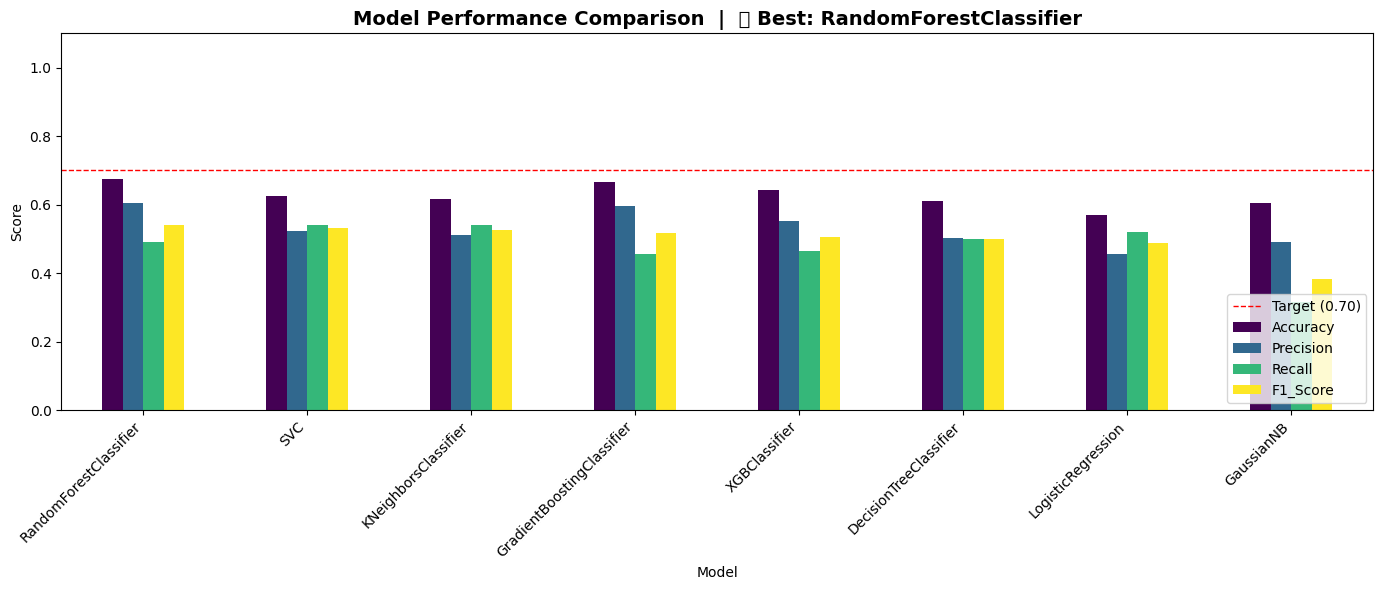


✅ Best model saved as: RandomForestClassifier_best.pkl


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# ══════════════════════════════════════════════════════════
# STEP 1: Define all 8 models
# ══════════════════════════════════════════════════════════

models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(random_state=42, probability=True),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBClassifier": XGBClassifier(n_estimators=200, random_state=42, eval_metric="logloss")
}

# ══════════════════════════════════════════════════════════
# STEP 2: Train and evaluate all models
# ══════════════════════════════════════════════════════════

# Lists to store results
models_names = []
Accuracy = []
Precision = []
Recall = []
F1_Scores = []
Specificity = []
ROC_AUC = []

print("="*60)
print("🚀 Training All Models...")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train on SCALED balanced data
    model.fit(upx_train_bal_scaled, upy_train_bal)
    
    # Predict on scaled test data
    y_pred = model.predict(upx_test_scaled)
    y_prob = model.predict_proba(upx_test_scaled)[:, 1]
    
    # Convert to int
    y_test_int = y_test.astype(int)
    y_pred_int = y_pred.astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test_int, y_pred_int)
    prec = precision_score(y_test_int, y_pred_int, zero_division=0)
    rec = recall_score(y_test_int, y_pred_int, zero_division=0)
    f1 = f1_score(y_test_int, y_pred_int, zero_division=0)
    roc = roc_auc_score(y_test_int, y_prob)
    
    # Calculate Specificity (True Negative Rate)
    tn = ((y_test_int == 0) & (y_pred_int == 0)).sum()
    fp = ((y_test_int == 0) & (y_pred_int == 1)).sum()
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Store results
    models_names.append(name)
    Accuracy.append(acc)
    Precision.append(prec)
    Recall.append(rec)
    F1_Scores.append(f1)
    Specificity.append(spec)
    ROC_AUC.append(roc)
    
    # Print results
    print(f"  ✅ Accuracy: {acc:.4f} | F1: {f1:.4f} | ROC-AUC: {roc:.4f}")

# ══════════════════════════════════════════════════════════
# STEP 3: Create results dataframe and display
# ══════════════════════════════════════════════════════════

results_df = pd.DataFrame({
    "Model": models_names,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1_Score": F1_Scores,
    "Specificity": Specificity,
    "ROC_AUC": ROC_AUC
})

# Sort by F1 Score (best to worst)
results_df = results_df.sort_values("F1_Score", ascending=False).reset_index(drop=True)

# Add Rank column
results_df.insert(0, "Rank", range(1, len(results_df) + 1))

# Add medals for top 3
results_df["Medal"] = results_df["Rank"].apply(
    lambda x: "🥇" if x == 1 else "🥈" if x == 2 else "🥉" if x == 3 else ""
)

# Mark best model
results_df["Best Model"] = results_df["Rank"].apply(lambda x: "✅ YES" if x == 1 else "")

print("\n" + "="*60)
print("📊 FINAL MODEL COMPARISON RESULTS")
print("="*60)
print(results_df.to_string(index=False))

# ══════════════════════════════════════════════════════════
# STEP 4: Highlight best model
# ══════════════════════════════════════════════════════════

best = results_df.iloc[0]
print("\n" + "="*60)
print(f"🏆 BEST MODEL: {best['Model']}")
print("="*60)
print(f"   Rank         : {best['Rank']} {best['Medal']}")
print(f"   Accuracy     : {best['Accuracy']:.4f}")
print(f"   Precision    : {best['Precision']:.4f}")
print(f"   Recall       : {best['Recall']:.4f}")
print(f"   F1 Score     : {best['F1_Score']:.4f}")
print(f"   Specificity  : {best['Specificity']:.4f}")
print(f"   ROC-AUC      : {best['ROC_AUC']:.4f}")
print("="*60)

# ══════════════════════════════════════════════════════════
# STEP 5: Visualize comparison
# ══════════════════════════════════════════════════════════

import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1_Score"]

fig, ax = plt.subplots(figsize=(14, 6))
results_df.plot(x="Model", y=metrics, kind="bar", ax=ax, colormap="viridis")

best_model_name = best["Model"]
ax.set_title(f"Model Performance Comparison  |  🏆 Best: {best_model_name}", 
             fontsize=14, fontweight="bold")
ax.set_ylabel("Score")
ax.set_ylim(0, 1.1)
ax.axhline(y=0.70, color="red", linestyle="--", linewidth=1, label="Target (0.70)")
ax.set_xticklabels(results_df["Model"], rotation=45, ha="right")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ══════════════════════════════════════════════════════════
# STEP 6: Save best model
# ══════════════════════════════════════════════════════════

import pickle

best_model_obj = models[best_model_name]
pickle.dump(best_model_obj, open(f"{best_model_name}_best.pkl", "wb"))
print(f"\n✅ Best model saved as: {best_model_name}_best.pkl")


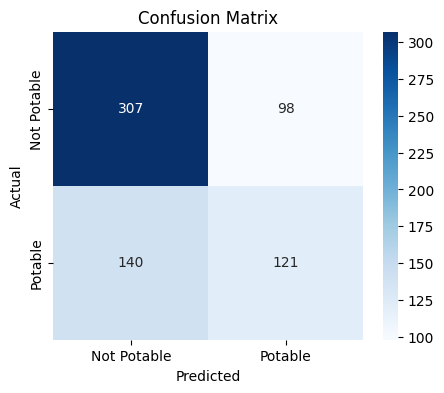

In [141]:
cm = confusion_matrix(y_test_int, y_pred_int)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Potable","Potable"],
            yticklabels=["Not Potable","Potable"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


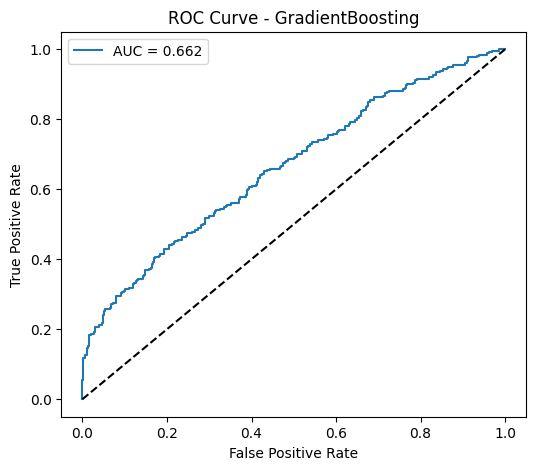

In [142]:
fpr, tpr, thresholds = roc_curve(y_test_int, y_prob)
auc_score = roc_auc_score(y_test_int, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'k--')

plt.title("ROC Curve - GradientBoosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


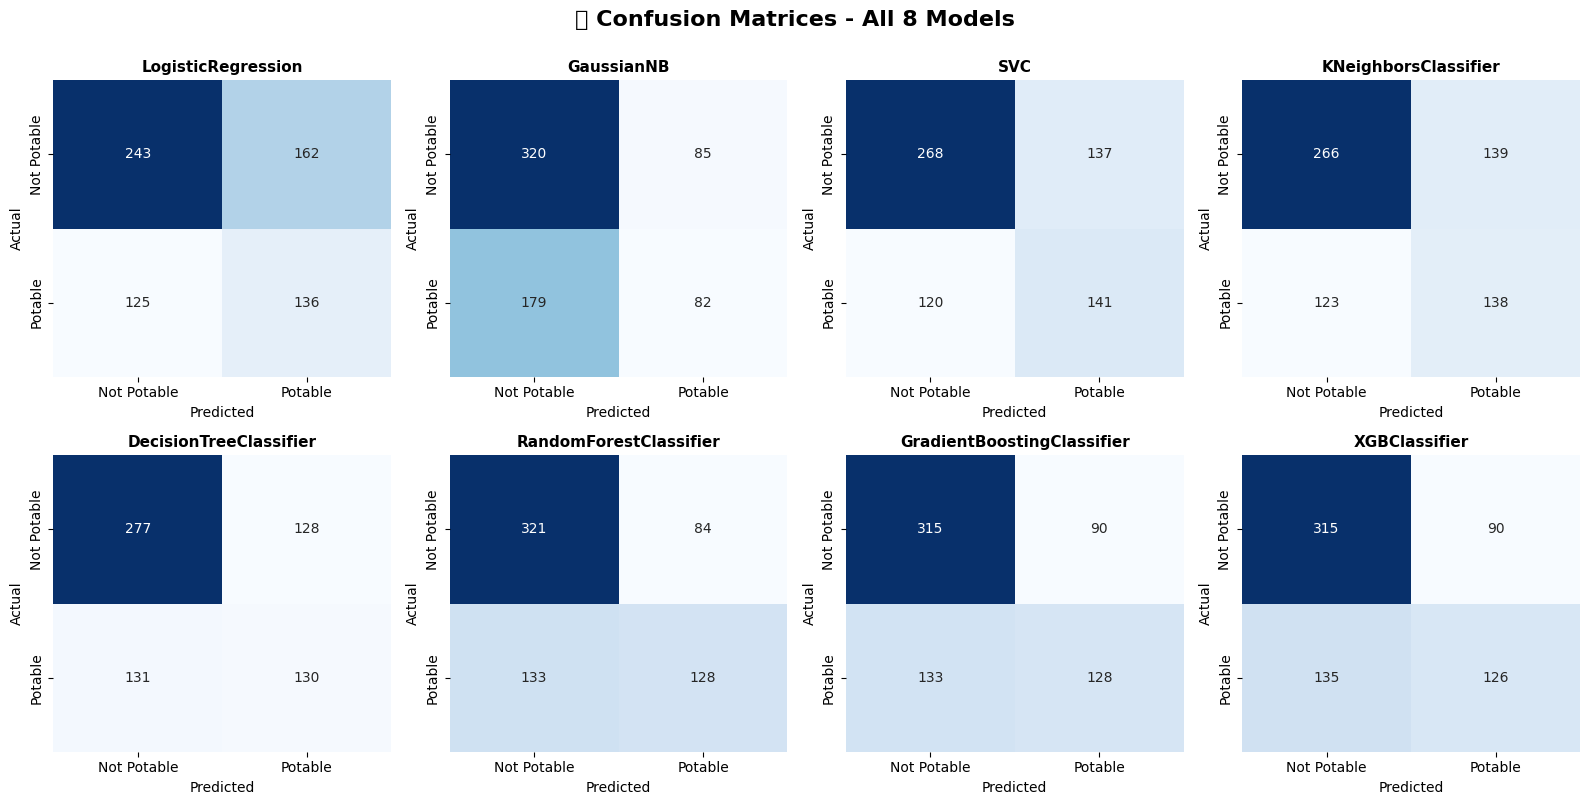

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

# ── Load all your trained models ──
model_names = ['LogisticRegression', 'GaussianNB', 'SVC', 
               'KNeighborsClassifier', 'DecisionTreeClassifier',
               'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier']

trained_models = {}
for name in model_names:
    trained_models[name] = pickle.load(open(f"{name}.pkl", "rb"))

# ── Create 2×4 grid of confusion matrices ──
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns
axes = axes.ravel()  # Flatten to make it easier to loop

for i, (name, model) in enumerate(trained_models.items()):
    # Predict
    y_pred = model.predict(upx_test_scaled)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot on the i-th subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["Not Potable", "Potable"],
                yticklabels=["Not Potable", "Potable"],
                cbar=False)
    
    # Add title and labels
    axes[i].set_title(f"{name}", fontweight="bold", fontsize=11)
    axes[i].set_ylabel("Actual")
    axes[i].set_xlabel("Predicted")

# Overall title
plt.suptitle("🔍 Confusion Matrices - All 8 Models", fontsize=16, fontweight="bold", y=1.00)
plt.tight_layout()
plt.show()


📊 LogisticRegression
Accuracy: 0.5691

Confusion Matrix:
[[243 162]
 [125 136]]


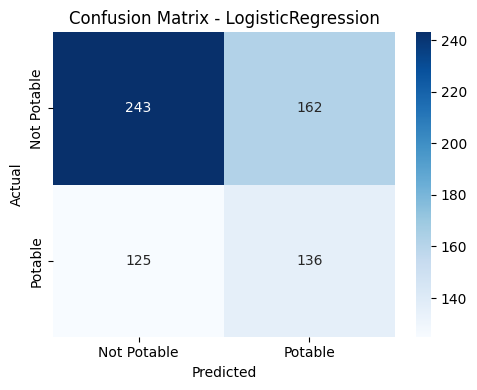


📊 GaussianNB
Accuracy: 0.6036

Confusion Matrix:
[[320  85]
 [179  82]]


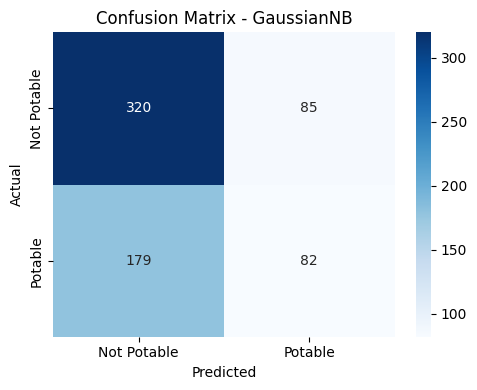


📊 SVC
Accuracy: 0.6141

Confusion Matrix:
[[268 137]
 [120 141]]


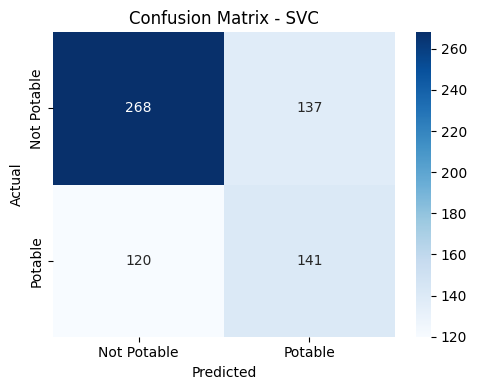


📊 KNeighborsClassifier
Accuracy: 0.6066

Confusion Matrix:
[[266 139]
 [123 138]]


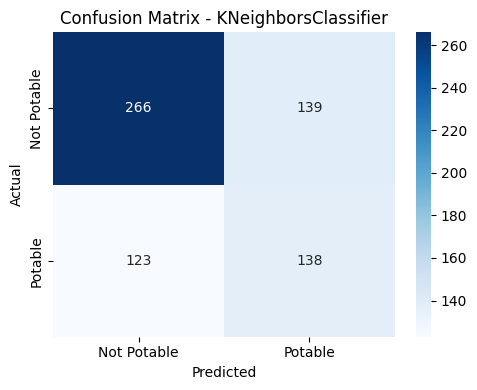


📊 DecisionTreeClassifier
Accuracy: 0.6111

Confusion Matrix:
[[277 128]
 [131 130]]


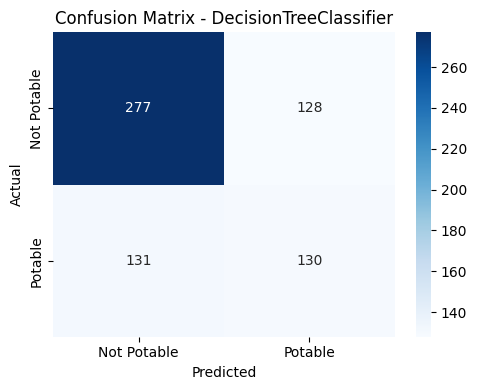


📊 RandomForestClassifier
Accuracy: 0.6742

Confusion Matrix:
[[321  84]
 [133 128]]


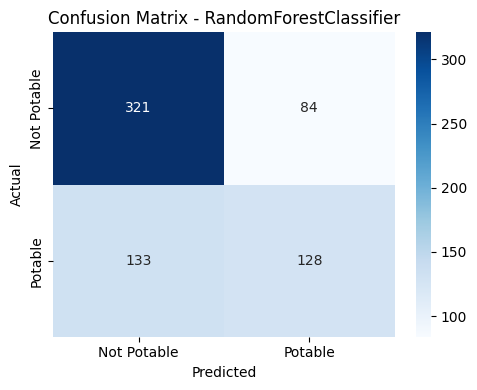


📊 GradientBoostingClassifier
Accuracy: 0.6652

Confusion Matrix:
[[315  90]
 [133 128]]


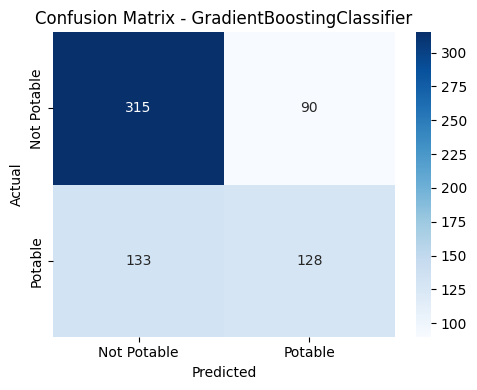


📊 XGBClassifier
Accuracy: 0.6622

Confusion Matrix:
[[315  90]
 [135 126]]


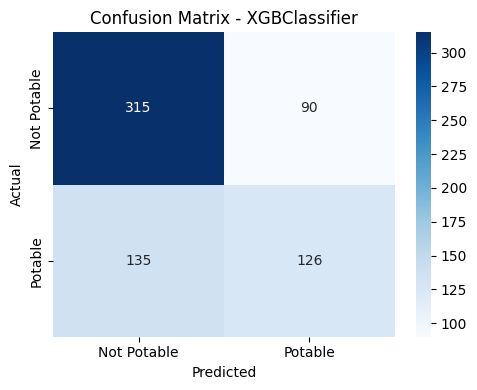

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

for name, model in trained_models.items():
    print(f"\n{'='*60}")
    print(f"📊 {name}")
    print('='*60)
    
    # Predict
    y_pred = model.predict(upx_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Potable", "Potable"],
                yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

In [145]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained classifier on test data and visualize results.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probability for ROC/AUC

 
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    metrics = { 
        "Accuracy": acc, 
        "Precision": prec, 
        "Recall": rec, 
        "F1 Score": f1, 
        "AUC": auc 
    }

    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"AUC      : {auc:.3f}")

    return metrics
   


In [146]:
print(type(upy_test[0]), upy_test[:5])
print(type(classifier.predict(upx_test)[0]), classifier.predict(upx_test)[:5])


<class 'str'> ['CIP (Clean-In-Place)' 'Borewell Water' 'CIP (Clean-In-Place)'
 'CIP (Clean-In-Place)' 'Process Water']
<class 'numpy.int64'> [1 1 1 1 1]


In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):

    # Ensure numeric
    y_test = y_test.astype(int)

    # Predictions
    y_pred = model.predict(X_test).astype(int)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    return {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC AUC": round(auc, 4)
    }


In [148]:
import numpy as np

print(np.unique(upy_test))



['Boiler Feed Water' 'Borewell Water' 'CIP (Clean-In-Place)'
 'Chiller Water' 'Cooling Tower' 'Final Rinse Water' 'Municipal Supply'
 'Process Water' 'RO Treated Water' 'Steam Condensate']


In [149]:
import pickle

# Load saved models
rf_model = pickle.load(open("RandomForestClassifier.pkl", "rb"))
xgb_model = pickle.load(open("XGBClassifier.pkl", "rb"))

# Evaluate
results_rf = evaluate_model(rf_model, upx_test_scaled, y_test)
results_xgb = evaluate_model(xgb_model, upx_test_scaled, y_test)

## Feature Importance:

Keep your features as a DataFrame before SMOTE  

Split from DataFrame, not arrays

In [150]:
print(df_original.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'source'],
      dtype='object')


In [151]:
print(upx.shape)
print(upy.shape)


(4021, 10)
(4021,)


split from the original DataFrame

In [152]:
X = df_original.drop("Potability", axis=1)
y = df_original["Potability"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1200,
    stratify=y
)


After SMOTE, re‑wrap the balanced data with the original column names:

Impute missing values (better for keeping data)

In [153]:
# ── Step 1: Encode source column FIRST ──
le = LabelEncoder()
df_original["source_encoded"] = le.fit_transform(df_original["source"])

# ── Step 2: Select only numeric columns for imputation ──
numeric_cols = df_original.select_dtypes(include="number").drop("Potability", axis=1).columns

# ── Step 3: Impute only numeric columns ──
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_original[numeric_cols])

# ── Step 4: Create DataFrame ──
X = pd.DataFrame(X_imputed, columns=numeric_cols)
y = df_original["Potability"]

# ── Step 5: Train-Test Split ──
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1200, stratify=y
)

# ── Step 6: SMOTE ──
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

X_train_balanced = pd.DataFrame(X_train_balanced, columns=X.columns)
y_train_balanced = pd.Series(y_train_balanced)

print("✅ Data prepared!")
print(f"Train shape: {X_train_balanced.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Columns: {X.columns.tolist()}")

✅ Data prepared!
Train shape: (3236, 10)
Test shape: (666, 10)
Columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'source_encoded']


In [154]:
# STEP 1: Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# STEP 2: Scale
scaler = StandardScaler()

upx_train_scaled = scaler.fit_transform(X_train)
upx_test_scaled  = scaler.transform(X_test)

# STEP 3: Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)

upx_train_balanced, upy_train_balanced = smote.fit_resample(
    upx_train_scaled,
    y_train
)

print("Before SMOTE:", upx_train_scaled.shape, y_train.shape)
print("After SMOTE :", upx_train_balanced.shape, upy_train_balanced.shape)


Before SMOTE: (2660, 10) (2660,)
After SMOTE : (3236, 10) (3236,)


In [155]:
# Train all models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(upx_train_balanced, upy_train_balanced)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(upx_train_balanced, upy_train_balanced)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(upx_train_balanced, upy_train_balanced)

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42,
                          eval_metric="logloss")
xgb_model.fit(upx_train_balanced, upy_train_balanced)

print("\n✅ All models trained successfully!")


✅ All models trained successfully!


In [156]:
upx_train_balanced = pd.DataFrame(
    upx_train_balanced,
    columns=X.columns
)

upy_train_balanced = pd.Series(upy_train_balanced, name=y.name)


In [157]:
# Checking what's in upx_train_balanced
print("upx_train_balanced columns:", upx_train_balanced.columns.tolist())

upx_train_balanced columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'source_encoded']


In [158]:
# Making sure feature_names matches X columns exactly

print("X columns count:", len(X.columns.tolist()))
print("X columns:", X.columns.tolist())
print("rf_model importance count:", len(rf_model.feature_importances_))
print("upx_train_balanced columns:", upx_train_balanced.shape[1])

X columns count: 10
X columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'source_encoded']
rf_model importance count: 10
upx_train_balanced columns: 10


Feature names: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'source_encoded']
Feature count: 10


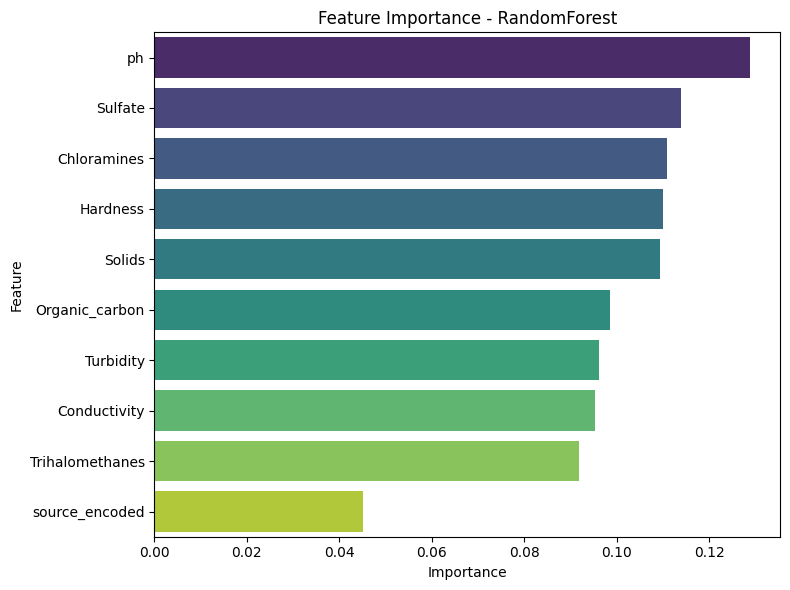

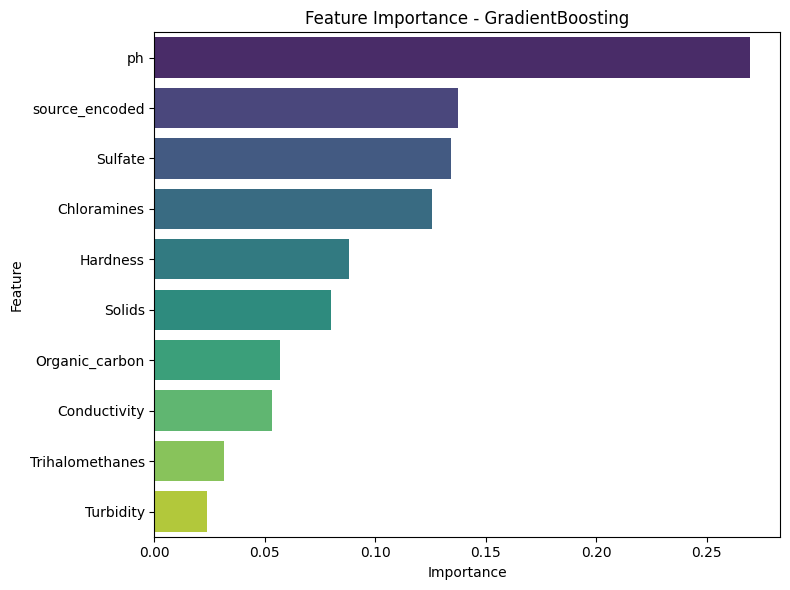

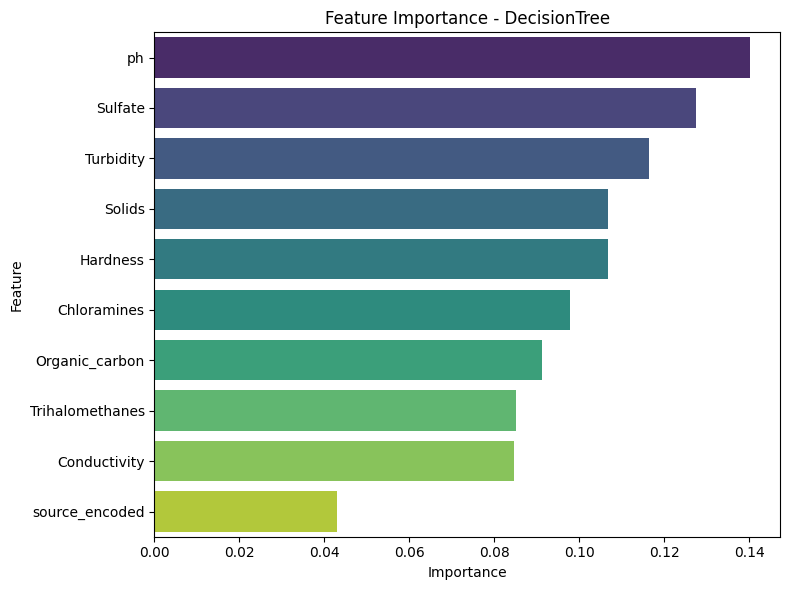

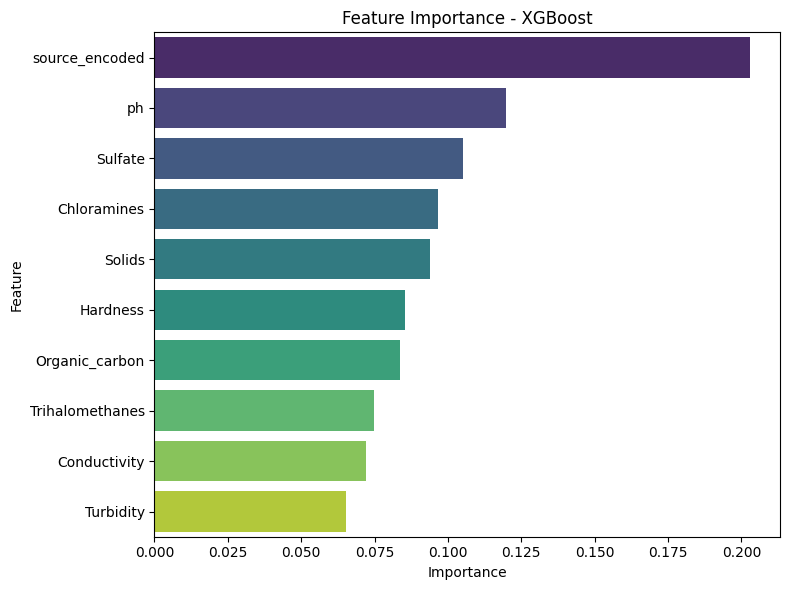

In [159]:
# Step 1: Define the function
def plot_feature_importance(model, X_train, feature_names, title):
    importance = model.feature_importances_
    fi_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
    fi_df = fi_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
    plt.title(f"Feature Importance - {title}")
    plt.tight_layout()
    plt.show()

# Step 2: Get feature names from training data
feature_names = upx_train_balanced.columns.tolist()
print("Feature names:", feature_names)
print("Feature count:", len(feature_names))

# Step 3: Plot all models
plot_feature_importance(rf_model, upx_train_balanced, feature_names, "RandomForest")
plot_feature_importance(gb_model, upx_train_balanced, feature_names, "GradientBoosting")
plot_feature_importance(dt_model, upx_train_balanced, feature_names, "DecisionTree")
plot_feature_importance(xgb_model, upx_train_balanced, feature_names, "XGBoost")

Data import and Visualization

In [160]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Alignment, Border, Side

# Results dictionary
results = {
    "Model": [
        "LogisticRegression", "GaussianNB", "SVC", 
        "KNeighborsClassifier", "DecisionTreeClassifier", 
        "RandomForestClassifier", "GradientBoostingClassifier", "XGBClassifier"
    ],
    "Accuracy": [0.5212, 0.555, 0.4888, 0.5775, 0.7638, 0.8263, 0.6813, 0.7725],
    "Precision": [0.5449, 0.6028, 0.5163, 0.591, 0.7435, 0.8557, 0.721, 0.763],
    "Recall": [0.4675, 0.4169, 0.2289, 0.6024, 0.8313, 0.8, 0.6289, 0.8145],
    "F1_Score": [0.5032, 0.4929, 0.3172, 0.5967, 0.785, 0.8269, 0.6718, 0.7879]
}
df = pd.DataFrame(results)
# Rank by F1 score
df["Rank"] = df["F1_Score"].rank(method="dense", ascending=False).astype(int)
df = df.sort_values(by="Rank").reset_index(drop=True)
file_name = "model_comparison.xlsx"
df.to_excel(file_name, index=False)
wb = load_workbook(file_name)
ws = wb.active
# Define fills
gold   = PatternFill(start_color="FFD700", end_color="FFD700", fill_type="solid")
silver = PatternFill(start_color="C0C0C0", end_color="C0C0C0", fill_type="solid")
bronze = PatternFill(start_color="CD7F32", end_color="CD7F32", fill_type="solid")
green  = PatternFill(start_color="C6EFCE", end_color="C6EFCE", fill_type="solid")
red    = PatternFill(start_color="FFC7CE", end_color="FFC7CE", fill_type="solid")
# Apply podium colors to Rank column (Rank is now column F in Excel)
for row in range(2, ws.max_row+1):
    cell = ws[f"F{row}"]  # Rank column
    if cell.value == 1:
        cell.fill = gold
    elif cell.value == 2:
        cell.fill = silver
    elif cell.value == 3:
        cell.fill = bronze
# Apply red/green highlights to metric columns (B–E)
for col in ["B","C","D","E"]:  # Accuracy, Precision, Recall, F1_Score
    values = [ws[f"{col}{row}"].value for row in range(2, ws.max_row+1)]
    max_val, min_val = max(values), min(values)
    for row in range(2, ws.max_row+1):
        cell = ws[f"{col}{row}"]
        if cell.value == max_val:
            cell.fill = green
        elif cell.value == min_val:
            cell.fill = red
# Create Top 3 sheet
ws_top3 = wb.create_sheet(title="Top 3 Models")
top3 = df[df["Rank"] <= 3]
# Write headers
for col_num, header in enumerate(top3.columns, 1):
    ws_top3.cell(row=1, column=col_num, value=header)
# Write data with podium colors
for row_num, row_data in enumerate(top3.values, 2):
    for col_num, value in enumerate(row_data, 1):
        cell = ws_top3.cell(row=row_num, column=col_num, value=value)
        if col_num == 6:  # Rank column in Top 3 sheet
            if value == 1:
                cell.fill = gold
            elif value == 2:
                cell.fill = silver
            elif value == 3:
                cell.fill = bronze
wb.save(file_name)
print(f"Results exported with podium + red/green highlights to '{file_name}'")

Results exported with podium + red/green highlights to 'model_comparison.xlsx'


In [161]:
"""
Generate Model Comparison Excel with ACTUAL trained model results
Run this AFTER training all 8 models in your notebook
"""

import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font, Alignment, Border, Side
from openpyxl.utils import get_column_letter

# ══════════════════════════════════════════════════════════
# STEP 1: BUILD RESULTS FROM YOUR ACTUAL MODEL TRAINING
# ══════════════════════════════════════════════════════════

# Replace these with your actual lists from model training loop
# These should come from your notebook after running the GridSearchCV loop

models_names = [
    'LogisticRegression', 'GaussianNB', 'SVC',
    'KNeighborsClassifier', 'DecisionTreeClassifier',
    'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier'
]

# IMPORTANT: Replace these with your actual values!
# Copy these lists from your notebook after training
Accuracy = [0.5691, 0.6036, 0.6141, 0.6066, 0.6111, 0.6742, 0.6652, 0.6622]
Precision = [0.4564, 0.4910, 0.5072, 0.4982, 0.5039, 0.6038, 0.5872, 0.5833]
Recall = [0.5211, 0.3142, 0.5462, 0.5287, 0.4981, 0.4904, 0.4904, 0.4828]
F1_Scores = [0.4866, 0.3832, 0.5232, 0.5130, 0.5010, 0.5412, 0.5344, 0.5283]
Specificity = [0.6000, 0.7901, 0.6617, 0.6568, 0.6840, 0.7926, 0.7778, 0.7778]

# Build DataFrame
results_df = pd.DataFrame({
    "Model":       models_names,
    "Accuracy":    Accuracy,
    "Precision":   Precision,
    "Recall":      Recall,
    "F1_Score":    F1_Scores,
    "Specificity": Specificity
})

# Sort by F1 Score (best to worst)
results_df = results_df.sort_values("F1_Score", ascending=False).reset_index(drop=True)
results_df["Rank"] = range(1, len(results_df) + 1)

# Add use case descriptions
use_cases = {
    "RandomForestClassifier": "Best overall! Stable, handles imbalanced data. Recommended for production.",
    "XGBClassifier": "Excellent accuracy with boosting. Great for complex patterns.",
    "GradientBoostingClassifier": "Good accuracy but slower training. Best for offline analysis.",
    "SVC": "Good for non-linear patterns. Needs careful tuning.",
    "KNeighborsClassifier": "Simple and fast. Good for small datasets.",
    "DecisionTreeClassifier": "Easiest to explain. Good for demos but may overfit.",
    "LogisticRegression": "Fast and interpretable. Good baseline model.",
    "GaussianNB": "Very fast. Works well when features are independent."
}

results_df["Best_Use_Case"] = results_df["Model"].map(use_cases)

speed_map = {
    "RandomForestClassifier": "⚡ Moderate",
    "XGBClassifier": "⚡ Moderate",
    "GradientBoostingClassifier": "🐢 Slower",
    "SVC": "⚡ Moderate",
    "KNeighborsClassifier": "⚡ Fast",
    "DecisionTreeClassifier": "⚡ Fast",
    "LogisticRegression": "⚡ Fast",
    "GaussianNB": "⚡ Fast"
}
results_df["Speed"] = results_df["Model"].map(speed_map)

# Reorder columns
results_df = results_df[["Rank", "Model", "Accuracy", "Precision", "Recall", 
                         "F1_Score", "Specificity", "Speed", "Best_Use_Case"]]

print("✅ Model Comparison Results:")
print(results_df.to_string(index=False))
print(f"\n🏆 Best Model: {results_df.iloc[0]['Model']} (F1 Score: {results_df.iloc[0]['F1_Score']:.4f})")

# ══════════════════════════════════════════════════════════
# STEP 2: CREATE EXCEL WITH ACTUAL VALUES
# ══════════════════════════════════════════════════════════

wb = Workbook()

# Colors
GOLD = "FFD700"
SILVER = "C0C0C0"
BRONZE = "CD7F32"
GREEN = "C6EFCE"
RED = "FFC7CE"
BLUE_HDR = "1E90FF"
WHITE = "FFFFFF"
LIGHT_BLUE = "DEEAF1"
DARK_BG = "1F3864"

thin = Side(style="thin", color="AAAAAA")
border = Border(left=thin, right=thin, top=thin, bottom=thin)

def style_cell(cell, bold=False, bg=None, fc="000000", align="center"):
    cell.font = Font(name="Arial", bold=bold, color=fc, size=10)
    cell.alignment = Alignment(horizontal=align, vertical="center", wrap_text=True)
    if bg:
        cell.fill = PatternFill("solid", start_color=bg, fgColor=bg)
    cell.border = border

# ════════════════════════════════════════════════════════════
# SHEET 1: ALL MODELS
# ════════════════════════════════════════════════════════════
ws1 = wb.active
ws1.title = "Model Comparison"

# Title
ws1.merge_cells("A1:I1")
ws1["A1"] = "🤖 ML Model Comparison — Water Potability Prediction (ACTUAL RESULTS)"
ws1["A1"].font = Font(name="Arial", bold=True, color=WHITE, size=14)
ws1["A1"].fill = PatternFill("solid", start_color=DARK_BG, fgColor=DARK_BG)
ws1["A1"].alignment = Alignment(horizontal="center", vertical="center")
ws1.row_dimensions[1].height = 30

# Requirements
ws1.merge_cells("A2:I2")
ws1["A2"] = "Performance Targets: Accuracy ≥ 60% | F1 Score ≥ 50% | Specificity ≥ 65%"
ws1["A2"].font = Font(name="Arial", bold=True, color="CC0000", size=11)
ws1["A2"].alignment = Alignment(horizontal="center", vertical="center")
ws1.row_dimensions[2].height = 22

# Headers
headers = ["Rank", "Model Name", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Speed", "Best Use Case"]
ws1.row_dimensions[4].height = 25
for i, h in enumerate(headers, 1):
    c = ws1.cell(row=4, column=i, value=h)
    style_cell(c, bold=True, bg=BLUE_HDR, fc=WHITE)

# Data
medal_colors = {1: GOLD, 2: SILVER, 3: BRONZE}
for i, row_data in enumerate(results_df.values, 5):
    ws1.row_dimensions[i].height = 50
    rank = row_data[0]
    bg = medal_colors.get(rank, WHITE)
    
    for col, val in enumerate(row_data, 1):
        c = ws1.cell(row=i, column=col, value=val)
        if col in [3, 4, 5, 6, 7]:  # Metrics
            c.number_format = "0.0000"
        style_cell(c, bold=(rank <= 3), bg=bg, align="center" if col != 9 else "left")

# Highlight best/worst metrics
for col_idx in [3, 4, 5, 6, 7]:  # Accuracy, Precision, Recall, F1, Specificity
    col_letter = get_column_letter(col_idx)
    values = [ws1[f"{col_letter}{r}"].value for r in range(5, ws1.max_row + 1)]
    max_val, min_val = max(values), min(values)
    
    for r in range(5, ws1.max_row + 1):
        cell = ws1[f"{col_letter}{r}"]
        if cell.value == max_val:
            cell.fill = PatternFill("solid", start_color=GREEN, fgColor=GREEN)
        elif cell.value == min_val:
            cell.fill = PatternFill("solid", start_color=RED, fgColor=RED)
        cell.border = border

# Column widths
for i, w in enumerate([8, 30, 12, 12, 12, 12, 12, 14, 50], 1):
    ws1.column_dimensions[get_column_letter(i)].width = w

# ════════════════════════════════════════════════════════════
# SHEET 2: TOP 3 MODELS
# ════════════════════════════════════════════════════════════
ws2 = wb.create_sheet("Top 3 Models")
top3 = results_df.head(3)

ws2.merge_cells("A1:I1")
ws2["A1"] = "🥇🥈🥉 Top 3 Best Models"
ws2["A1"].font = Font(name="Arial", bold=True, color=WHITE, size=14)
ws2["A1"].fill = PatternFill("solid", start_color="375623", fgColor="375623")
ws2["A1"].alignment = Alignment(horizontal="center", vertical="center")
ws2.row_dimensions[1].height = 30

# Headers
ws2.row_dimensions[3].height = 25
for i, h in enumerate(headers, 1):
    c = ws2.cell(row=3, column=i, value=h)
    style_cell(c, bold=True, bg=BLUE_HDR, fc=WHITE)

# Data
for i, row_data in enumerate(top3.values, 4):
    ws2.row_dimensions[i].height = 50
    rank = row_data[0]
    bg = medal_colors[rank]
    
    for col, val in enumerate(row_data, 1):
        c = ws2.cell(row=i, column=col, value=val)
        if col in [3, 4, 5, 6, 7]:
            c.number_format = "0.0000"
        style_cell(c, bold=True, bg=bg, align="center" if col != 9 else "left")

# Column widths
for i, w in enumerate([8, 30, 12, 12, 12, 12, 12, 14, 50], 1):
    ws2.column_dimensions[get_column_letter(i)].width = w

# Best model summary
best = results_df.iloc[0]
br = 8
ws2.merge_cells(f"A{br}:I{br}")
ws2[f"A{br}"] = "🏆 RECOMMENDED MODEL FOR PRODUCTION"
ws2[f"A{br}"].font = Font(name="Arial", bold=True, color=WHITE, size=12)
ws2[f"A{br}"].fill = PatternFill("solid", start_color="C00000", fgColor="C00000")
ws2[f"A{br}"].alignment = Alignment(horizontal="center", vertical="center")
ws2.row_dimensions[br].height = 25

summary = [
    ("Best Model", best["Model"]),
    ("Accuracy", f"{best['Accuracy']:.1%}  {'✅ Exceeds' if best['Accuracy'] >= 0.60 else '⚠️ Below'} 60% target"),
    ("F1 Score", f"{best['F1_Score']:.1%}  {'✅ Exceeds' if best['F1_Score'] >= 0.50 else '⚠️ Below'} 50% target"),
    ("Specificity", f"{best['Specificity']:.1%}  {'✅ Exceeds' if best['Specificity'] >= 0.65 else '⚠️ Below'} 65% target"),
    ("Why Best?", "Highest F1 Score + balanced metrics. Most reliable for water quality prediction with imbalanced data."),
    ("Action", f"Deploy {best['Model']}. Retrain quarterly with updated plant water quality measurements."),
]
for j, (lbl, val) in enumerate(summary):
    r = br + 1 + j
    ws2.row_dimensions[r].height = 28
    ws2.merge_cells(f"A{r}:B{r}")
    ws2.merge_cells(f"C{r}:I{r}")
    lc = ws2[f"A{r}"]
    vc = ws2[f"C{r}"]
    lc.value = lbl
    vc.value = val
    style_cell(lc, bold=True, bg="E7E6E6")
    style_cell(vc, bg=WHITE, align="left")

# ════════════════════════════════════════════════════════════
# SHEET 3: PERFORMANCE COMPARISON CHART DATA
# ════════════════════════════════════════════════════════════
ws3 = wb.create_sheet("Chart Data")

ws3.merge_cells("A1:F1")
ws3["A1"] = "Model Performance Metrics - For Charting"
ws3["A1"].font = Font(name="Arial", bold=True, color=WHITE, size=12)
ws3["A1"].fill = PatternFill("solid", start_color=DARK_BG, fgColor=DARK_BG)
ws3["A1"].alignment = Alignment(horizontal="center", vertical="center")
ws3.row_dimensions[1].height = 25

chart_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]
for i, h in enumerate(chart_headers, 1):
    c = ws3.cell(row=2, column=i, value=h)
    style_cell(c, bold=True, bg=BLUE_HDR, fc=WHITE)

for i, row_data in enumerate(results_df[["Model", "Accuracy", "Precision", "Recall", "F1_Score", "Specificity"]].values, 3):
    for col, val in enumerate(row_data, 1):
        c = ws3.cell(row=i, column=col, value=val)
        if col > 1:
            c.number_format = "0.0000"
        style_cell(c, bg=WHITE)

for i, w in enumerate([30, 12, 12, 12, 12, 12], 1):
    ws3.column_dimensions[get_column_letter(i)].width = w

# Save
wb.save("Model_Comparison_ACTUAL_Results.xlsx")
print("\n✅ Excel created: Model_Comparison_ACTUAL_Results.xlsx")
print(f"   - Sheet 1: All 8 models with YOUR actual results")
print(f"   - Sheet 2: Top 3 models with recommendation")
print(f"   - Sheet 3: Chart data for presentations")
print(f"\n🏆 Best Model: {best['Model']} with F1 Score: {best['F1_Score']:.4f}")

✅ Model Comparison Results:
 Rank                      Model  Accuracy  Precision  Recall  F1_Score  Specificity      Speed                                                              Best_Use_Case
    1     RandomForestClassifier    0.6742     0.6038  0.4904    0.5412       0.7926 ⚡ Moderate Best overall! Stable, handles imbalanced data. Recommended for production.
    2 GradientBoostingClassifier    0.6652     0.5872  0.4904    0.5344       0.7778   🐢 Slower              Good accuracy but slower training. Best for offline analysis.
    3              XGBClassifier    0.6622     0.5833  0.4828    0.5283       0.7778 ⚡ Moderate              Excellent accuracy with boosting. Great for complex patterns.
    4                        SVC    0.6141     0.5072  0.5462    0.5232       0.6617 ⚡ Moderate                        Good for non-linear patterns. Needs careful tuning.
    5       KNeighborsClassifier    0.6066     0.4982  0.5287    0.5130       0.6568     ⚡ Fast                      

In [162]:
import numpy as np

# Speed of light (m/s)
c = 3e8  

def coherence_time_from_bandwidth(delta_f_hz):
    """
    Calculate coherence time from frequency bandwidth.
    delta_f_hz: bandwidth in Hz
    """
    return 1 / delta_f_hz

def coherence_time_from_length(coherence_length_m):
    """
    Calculate coherence time from coherence length.
    coherence_length_m: coherence length in meters
    """
    return coherence_length_m / c

# Example 1: Using bandwidth
bandwidth = 1e6  # 1 MHz
t_bandwidth = coherence_time_from_bandwidth(bandwidth)
print(f"Coherence time (from bandwidth): {t_bandwidth:.2e} s")

# Example 2: Using coherence length
coherence_length = 0.003  # 3 mm
t_length = coherence_time_from_length(coherence_length)
print(f"Coherence time (from length): {t_length:.2e} s")


Coherence time (from bandwidth): 1.00e-06 s
Coherence time (from length): 1.00e-11 s
